In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2


# Matplotlib plots

# Lineplot

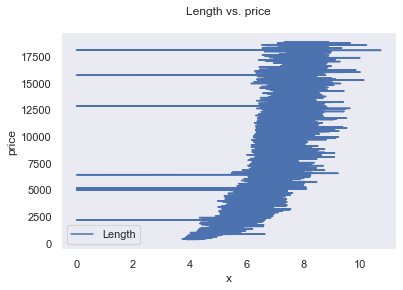

In [169]:
diamonds.sort_values(by=["price", "x"], inplace=True)

line = plt.figure() 

plt.plot("x","price", data=diamonds, label='Length')

plt.title('Length vs. price\n')
plt.xlabel('x')
plt.ylabel('price')
plt.grid()
plt.legend()
plt.show()

# Bar Plot

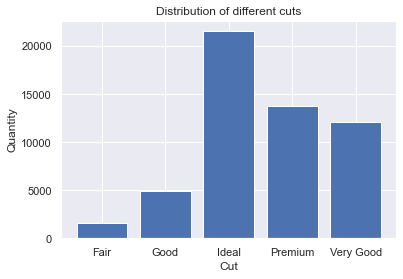

In [176]:
size = diamonds.groupby(['cut'])['carat'].agg(['count'])
size.reset_index(inplace=True)

bar = plt.figure()
plt.bar("cut","count", data=size)

plt.title('Distribution of different cuts')
plt.xlabel('Cut')
plt.ylabel('Quantity')
plt.show()

# Scatter plot

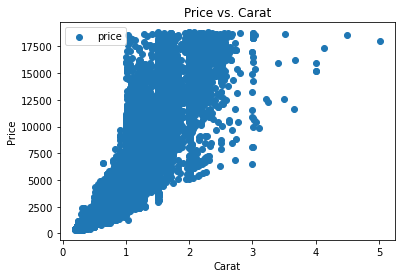

In [120]:
scatter = plt.figure() 

plt.scatter("carat","price", data=diamonds, label='price')

plt.title('Price vs. Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

# Pie chart

In [131]:
size_color = diamonds.groupby(['color_num'])['carat'].agg(['count'])
size_color.reset_index(inplace=True)
size_color

,color_num,count
0,0,2808
1,1,5422
2,2,8304
3,3,11292
4,4,9542
5,5,9797
6,6,6775


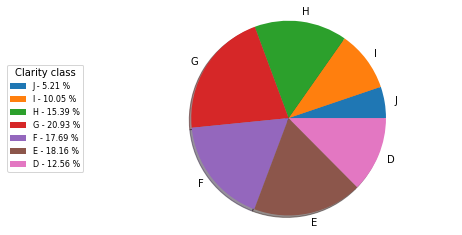

In [135]:
labels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
sizes = size_color['count']

pie, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels2, loc='center left',title='Clarity class', bbox_to_anchor=(-0.35, .5), fontsize=8)
plt.show()

# Box plot

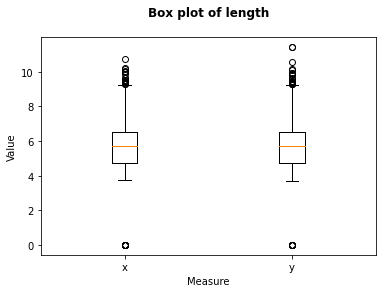

In [153]:
box = plt.figure()

data=diamonds[['x', 'y']]
labels = ['x', 'y']


# rectangular box plot
bplot1 = plt.boxplot(data, labels=labels)  
plt.title('Box plot of length\n', fontweight='bold')

plt.ylabel('Value')
plt.xlabel('Measure')

plt.show()

# Histogram

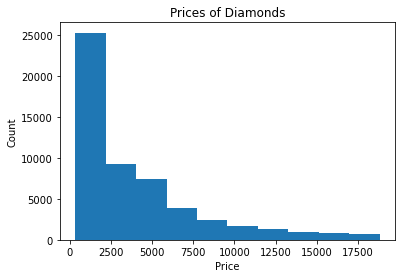

In [143]:
plt.hist(diamonds["price"])#, bins = 150)

# Adding and formatting title
plt.title("Prices of Diamonds")

plt.xlabel("Price")
plt.ylabel("Count")

plt.show()

# Multiple line plot

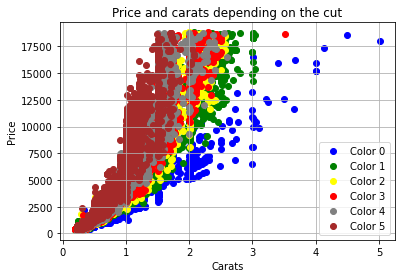

In [165]:
lines = plt.figure()
diamonds.sort_values(by=["carat", "price"], inplace=True)
colors = ['blue', 'green', 'yellow', 'red', 'grey', 'brown', 'pink']

for i in range(len(colors) - 1):
    class_color = diamonds[(diamonds['clarity_num'] == i)]
    plt.scatter("carat","price", data=class_color, color=colors[i], label=f'Color {i}')

plt.xlabel('Carats')
plt.ylabel('Price')

plt.title("Price and carats depending on the cut")
plt.legend()
plt.grid()
plt.show()

# Seaborn plots

# Line Plot

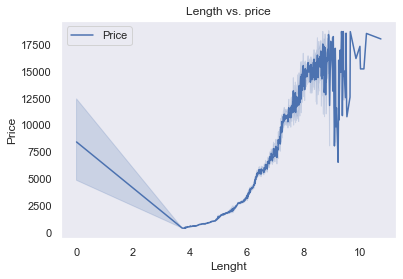

In [173]:
diamonds.sort_values(by=["x", "price"], inplace=True)
sns.lineplot(x="x", y="price",data=diamonds, label='Price')

plt.title('Length vs. price')
plt.xlabel('Lenght')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()

# Bar plot

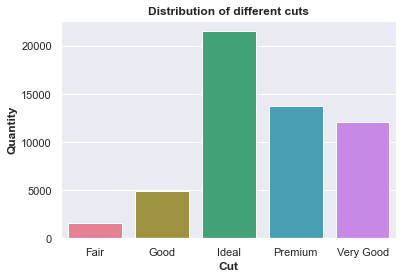

In [178]:
ax = sns.barplot(x="cut", y="count", data=size_cut, palette="husl")
plt.title('Distribution of different cuts', fontweight='bold')
plt.xlabel('Cut', fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.show()

# Scatter Plot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


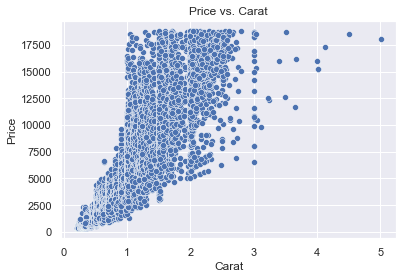

In [183]:
sns.scatterplot("carat","price", data=diamonds)
plt.title('Price vs. Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# Box Plot

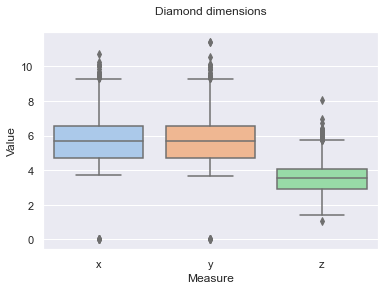

In [186]:
data=diamonds[['x','y','z']]
sns.set_palette("pastel")
box_sns=sns.boxplot(data=data)
plt.title('Diamond dimensions\n')

plt.ylabel('Value')
plt.xlabel('Measure')
plt.show()

# Violin Plot 

Text(0, 0.5, 'Measure')

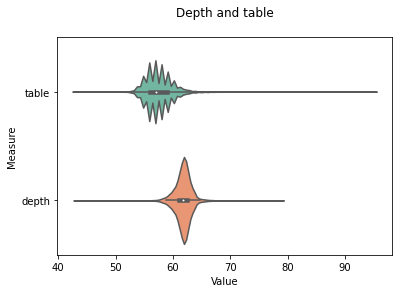

In [22]:
sns.set_palette("Set2")
sns.violinplot(data=diamonds[[ 'table', 'depth']], orient="h")
plt.title("Depth and table\n")
plt.xlabel("Value")
plt.ylabel("Measure")